<a href="https://colab.research.google.com/github/cardazuluaga/DLCourse/blob/main/Ej3MLP_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Generación de datos sintéticos
X_moons, y_moons = make_moons(n_samples=300, noise=0.2, random_state=42)
X_circles, y_circles = make_circles(n_samples=300, factor=0.5, noise=0.2, random_state=42)

In [3]:
# División de los conjuntos de datos en entrenamiento y prueba
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X_circles, y_circles, test_size=0.2, random_state=42)

In [4]:
# Entrenamiento de SVM y Perceptrón Multicapa para ambas configuraciones de datos
svm_moons = SVC(kernel='rbf', C=1)
svm_moons.fit(X_train_moons, y_train_moons)

svm_circles = SVC(kernel='rbf', C=1)
svm_circles.fit(X_train_circles, y_train_circles)

nn_moons = MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000)
nn_moons.fit(X_train_moons, y_train_moons)

nn_circles = MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000)
nn_circles.fit(X_train_circles, y_train_circles)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000)

In [5]:
# Función para visualizar la clasificación
def plot_decision_boundary(model, X, y, title):
    plt.figure(figsize=(8, 6))
    h = .02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

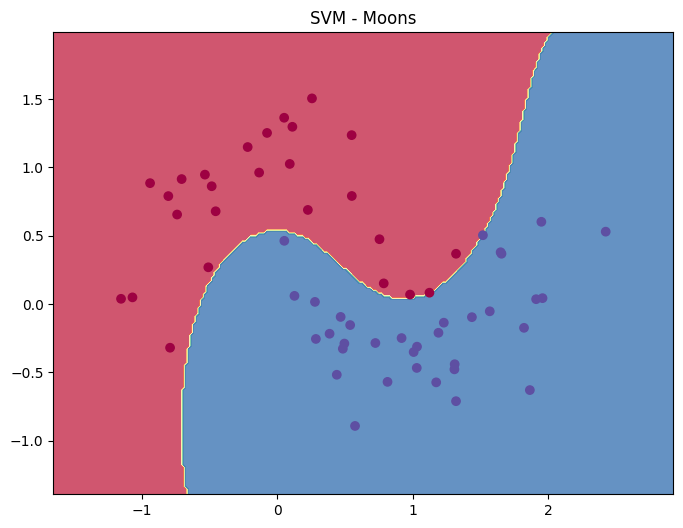

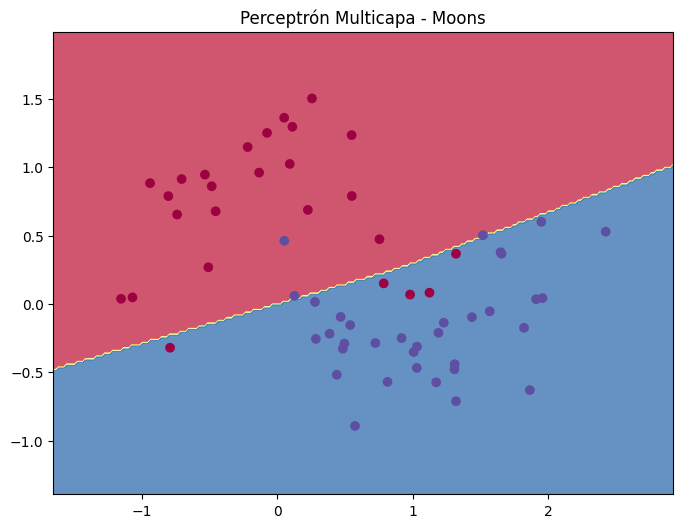

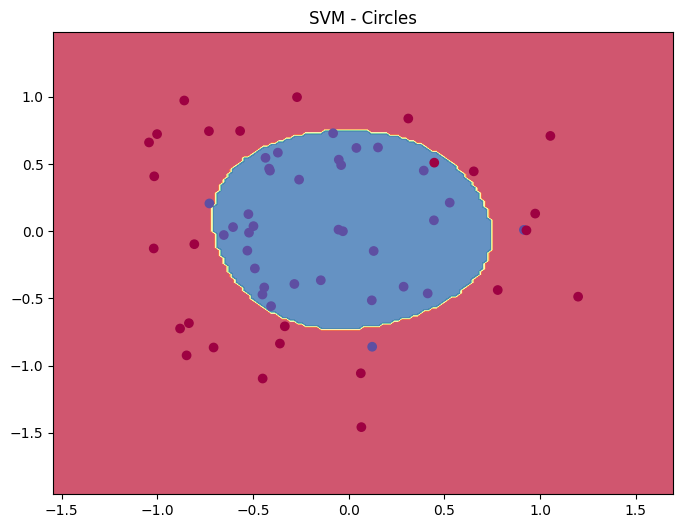

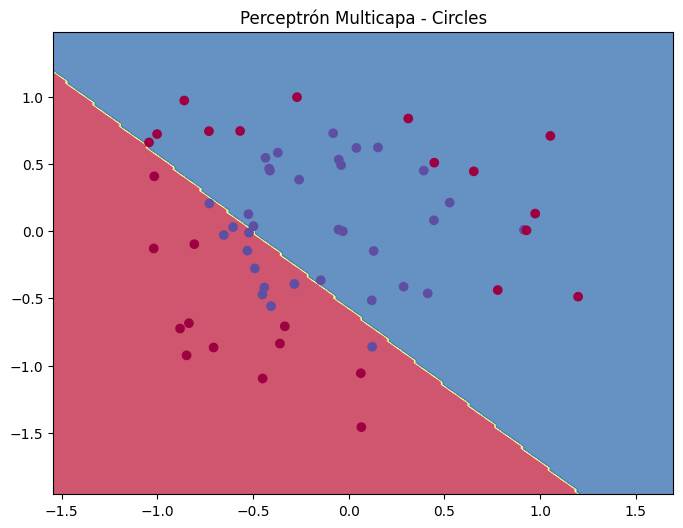

In [6]:
# Visualización de los resultados
plot_decision_boundary(svm_moons, X_test_moons, y_test_moons, "SVM - Moons")
plot_decision_boundary(nn_moons, X_test_moons, y_test_moons, "Perceptrón Multicapa - Moons")

plot_decision_boundary(svm_circles, X_test_circles, y_test_circles, "SVM - Circles")
plot_decision_boundary(nn_circles, X_test_circles, y_test_circles, "Perceptrón Multicapa - Circles")

In [7]:
# Predicciones de los modelos
svm_moons_predictions = svm_moons.predict(X_test_moons)
nn_moons_predictions = nn_moons.predict(X_test_moons)

svm_circles_predictions = svm_circles.predict(X_test_circles)
nn_circles_predictions = nn_circles.predict(X_test_circles)

# Cálculo del accuracy
svm_moons_accuracy = accuracy_score(y_test_moons, svm_moons_predictions)
nn_moons_accuracy = accuracy_score(y_test_moons, nn_moons_predictions)

svm_circles_accuracy = accuracy_score(y_test_circles, svm_circles_predictions)
nn_circles_accuracy = accuracy_score(y_test_circles, nn_circles_predictions)

# Mostrar resultados
print("Accuracy en el conjunto 'moons':")
print(f"SVM: {svm_moons_accuracy:.2f}")
print(f"Perceptrón Multicapa: {nn_moons_accuracy:.2f}")
print()

print("Accuracy en el conjunto 'circles':")
print(f"SVM: {svm_circles_accuracy:.2f}")
print(f"Perceptrón Multicapa: {nn_circles_accuracy:.2f}")

Accuracy en el conjunto 'moons':
SVM: 0.98
Perceptrón Multicapa: 0.87

Accuracy en el conjunto 'circles':
SVM: 0.93
Perceptrón Multicapa: 0.58
